# Potassium Channels Contribute to Activity-Dependent Scaling of Dendritic Inhibition

In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import ipywidgets as widgets
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pandas
import MultiCompartmentNeuronHelpers as mcnh
import scipy
import importlib
importlib.reload(mcnh)
%matplotlib inline
plt.rcParams['lines.linewidth'] = .5
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size']=10

## Run Simulation

To generate the data, run the simulation by opening a bash command prompt and running the command:
    
    mpiexec -n <# of cores> nrniv -mpi init.hoc

This will run through multiple sodium reversal and potassium conductance values using the built in NEURON bulletin board style parallelization, and will write .dat files encoding data into the '/data' directory.


## Load Data Files
The following code will load the associated data, calculate useful values, and generate Figure 6, and Figure 6-supplemental figure 1.

In [18]:
%%time
importlib.reload(mcnh)
ena= mcnh.load_ena_data()
gk= mcnh.load_gk_data()


Wall time: 2min 12s


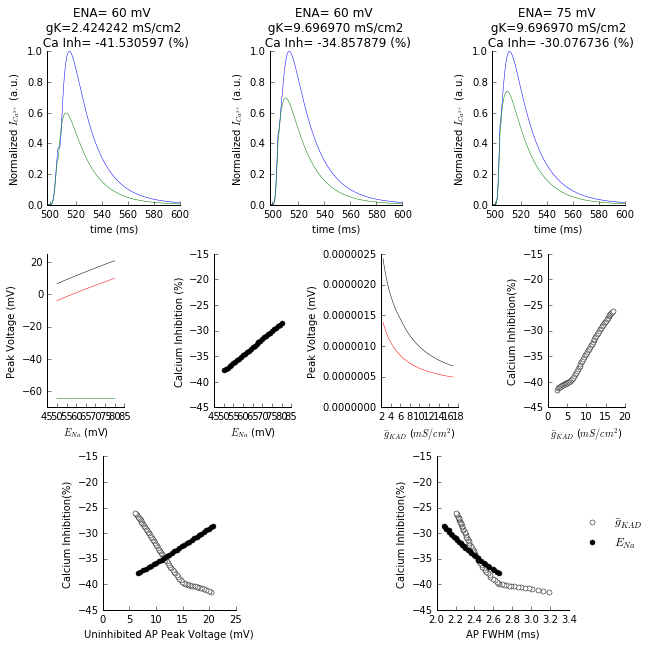

In [26]:
importlib.reload(mcnh)
fig1=mcnh.make_figure(ena, gk) 

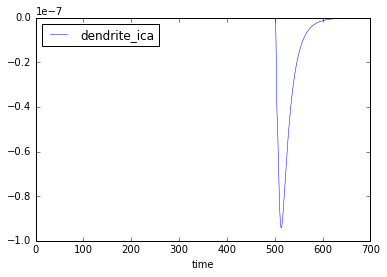

In [73]:
ena["car_1"]["RawData"][5]["uninhibitedbAP"].plot("time", "dendrite_ica")

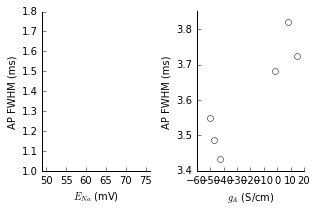

In [310]:
fig=plt.figure(figsize=[4.5,3])
ax=fig.add_subplot(122)
ax.plot(gk["car_1"]["CaInh"],gk["car_1"]["AP_widthU"], 'wo')
#ax.set_ylim([1,1.8])
ax.set_xlabel("$g_{A}$ (S/cm)")
ax.set_ylabel("AP FWHM (ms)")
#ax.set_xlim(2,25)
mcnh.format_axis(ax)
ax=fig.add_subplot(121)
#ax.plot(ena["car_1"]["ena"],ena["car_1"]["AP_widthU"], 'ko')
ax.set_ylim([1, 1.8])
ax.set_xlabel("$E_{Na}$ (mV)")
ax.set_ylabel("AP FWHM (ms)")
ax.set_xlim(49,76)
mcnh.format_axis(ax)
fig.tight_layout()
#fig.savefig("Figures/AP_width.pdf", format="pdf")

(499, 505)

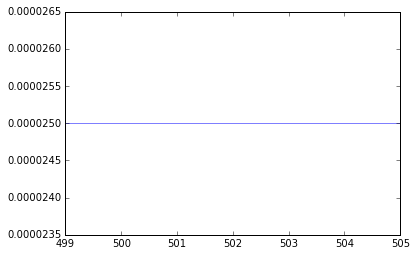

In [204]:
Area=0
conductancecorrectionfactor={"time":1, 
                                    "GSyn":1e-6 , # uS * S/uS
                                    "GNa":Area*1e-9, # pS/um2 * um2 * S/pS
                                    "GKv":Area*1e-9, # pS/um2 * um2 * S/pS 
                                    "GPas":Area*1e-8, # S/cm2 * um2 * cm2/um2
                                    "GKad":Area*1e-8} #(S/cm2) * um2 * cm2/um2

fig=plt.figure()
ax=fig.add_subplot(111)
#ax.plot(gk["car_1"]["RawData"][1]["uninhibitedbAP"].time, gk["car_1"]["RawData"][1]["uninhibitedbAP"].dendrite_na*1e-9)
#ax.plot(gk["car_1"]["RawData"][1]["uninhibitedbAP"].time, gk["car_1"]["RawData"][1]["uninhibitedbAP"].dendrite_kv*1e-9)
ax.plot(gk["car_1"]["RawData"][1]["uninhibitedbAP"].time, gk["car_1"]["RawData"][1]["uninhibitedbAP"].dendrite_pas)
plt.xlim([499,505])

In [52]:
importlib.reload(mcnh)
gk= mcnh.load_gk_data()

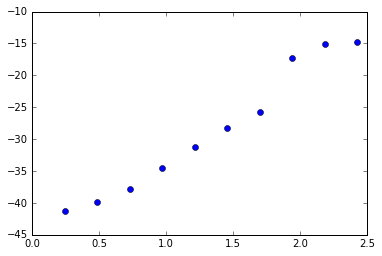

In [56]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(gk["car_1"]["gk"], gk["car_1"]["CaInh"], 'o')
#ax.plot(gk["car_1"]["RawData"][2]["uninhibitedbAP"].time, gk["car_1"]["RawData"][2]["uninhibitedbAP"].dendrite_v)
#ax.plot(gk["car_1"]["RawData"][0]["uninhibitedbAP"].time, gk["car_1"]["RawData"][0]["uninhibitedbAP"].soma_v)
#ax.plot(gk["car_1"]["RawData"][2]["uninhibitedbAP"].time, gk["car_1"]["RawData"][6]["uninhibitedbAP"].dendrite_v)
#ax.plot(gk["car_1"]["RawData"][9]["uninhibitedbAP"].time, gk["car_1"]["RawData"][9]["uninhibitedbAP"].dendrite_v)
#plt.xlim([459,560])


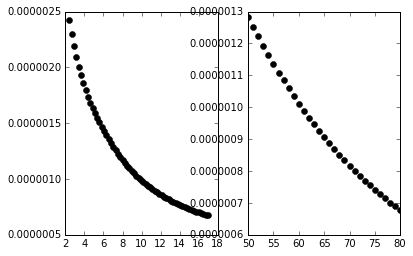

In [33]:
fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(gk["car_1"]["gk"],gk["car_1"]["CaPkU"], 'ko')
ax2=fig.add_subplot(122)
ax2.plot(ena["car_1"]["ena"],ena["car_1"]["CaPkU"], 'ko')
